# Fast RCNN Platform

This is a general introduction notebook for the fast RCNN processing platform. It has 5 major components:

1. **Regionizer**: Use selective search algorithm to extra regions from input image
2. **Detector**: With region candidates, it returns scores for each class of each region
3. **Labelizer**: Use the direct result from `Detector`, `Labelizer` will mark the region with specific class names and scores.
4. **Visualizer**: Visualize the final result.
5. **ImageReader**: Read image from a path.

## Setup

Initialize path and environment variables

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import _init_paths
import skimage.data
import matplotlib.pyplot as plt

from process_platform.image_reader import ImageReader
from process_platform.regionizer   import Regionizer
from process_platform.detector     import Detector
from process_platform.labelizer    import Labelizer
from process_platform.visualizer   import Visualizer

# print sys.path # check whether paths has been successfully loaded

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


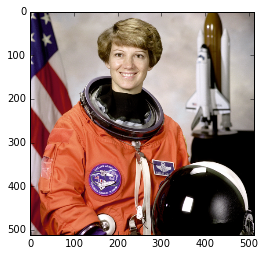

In [12]:
img = skimage.data.astronaut()
plt.imshow(img)

## Regionizer

Test regionizer with a random image.

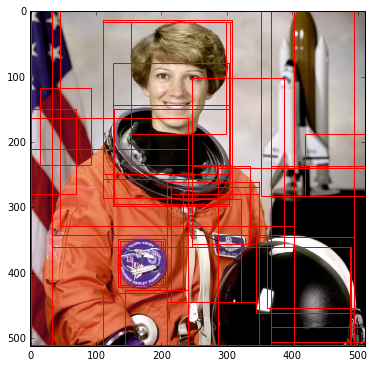

In [3]:
# initialize regionizer
regionizer = Regionizer()

# it will take about 30s
regionizer.show_regions(img)

# Detector

Detector is the core module which would call RCNN network. To simplify the usage, here we put all the caffe initialization procedures in the `Detector`'s `__init__` method.

In [4]:
detector = Detector()
scores, boxes = detector.detect(img, regionizer.regionize(img))

# Labelizer

Take `scores` and `boxes`.

In [15]:
labelizer = Labelizer()
result = labelizer.labelize(scores, boxes, classes=['person'])

# Visualizer

Visualize the result

Visualizing person ...
[  29.02542305   14.85229588  389.11685181  508.94064331    0.96029568]


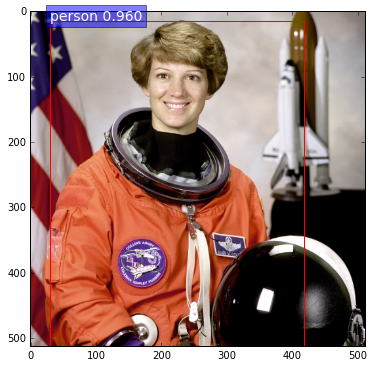

In [19]:
visualizer = Visualizer()
for class_name, dets in result.items():
    print 'Visualizing %s ...' % class_name
    visualizer.visualize_regions(img, class_name, dets)

# Compose All Together

In [40]:
def process(img, classes=[]):
    # create instances
    regionizer = Regionizer()
    detector = Detector()
    labelizer = Labelizer()
    visualizer = Visualizer()
    
    scores, boxes = detector.detect(img, regionizer.regionize(img))
    print scores
    print 'Finished detection'
    result = labelizer.labelize(scores, boxes, classes=classes)
    for class_name, dets in result.items():
        print 'Visualizing %s ...' % class_name
        visualizer.visualize_regions(img, class_name, dets)

Visualizing person ...
[  29.02542305   14.85229588  389.11685181  508.94064331    0.96029568]


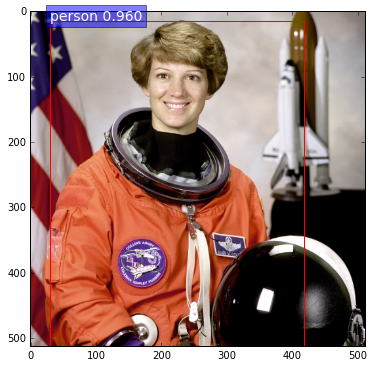

In [21]:
process(img, classes=['person'])

## UAV example

Here I take one patch from an UAV example image for example. After processing, I've found out the result is not so good. The main problem might lie in the trained model (`caffenet` is a small and general CNN model).

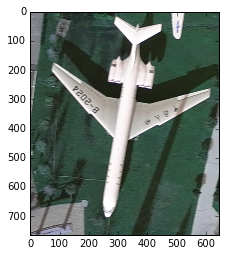

In [62]:
import cv2
import _init_paths
from fast_rcnn.config import cfg

img = cv2.imread(os.path.join(cfg.ROOT_DIR, 'data', 'uav', 'super_small_example.jpg'))
# img = cv2.resize(img, (0, 0), fx=0.3, fy=0.3)
plt.imshow(img)

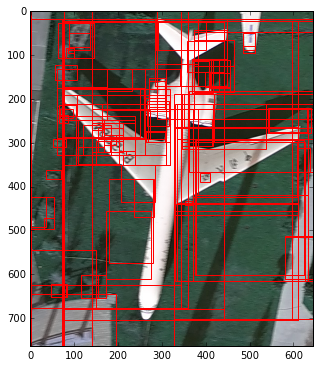

In [63]:
regionizer = Regionizer()
regionizer.show_regions(img)

In [64]:
scores, boxes = detector.detect(img, regionizer.regionize(img))

Finished detection
Max score for class aeroplane: 0.206431
{'aeroplane': array([], shape=(0, 5), dtype=float32)}
Visualizing aeroplane ...


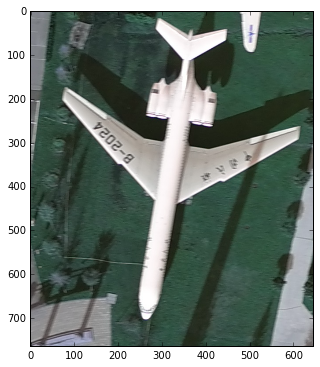

In [65]:
print 'Finished detection'
result = labelizer.labelize(scores, boxes, classes=['aeroplane'])
print result
for class_name, dets in result.items():
    print 'Visualizing %s ...' % class_name
    visualizer.visualize_regions(img, class_name, dets)